In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

### EDA on FER-2013 dataset

In [3]:
base_path = os.path.join('..', 'data', 'original_datasets', 'FER_2013')
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

emotions = os.listdir(train_path)

print(f"Number of emotions: {len(emotions)}\nEmotions: {emotions}")

Number of emotions: 7
Emotions: ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


In [4]:
total_train_images = sum(len(os.listdir(os.path.join(train_path, emotion))) for emotion in emotions)
total_test_images = sum(len(os.listdir(os.path.join(test_path, emotion))) for emotion in emotions)
print(f"Total number of train images: {total_train_images}")
print(f"Total number of test images: {total_test_images}")
print("\n")
for emotion in emotions:
    print(f"Number of train and test images for {emotion}: {len(os.listdir(os.path.join(train_path, emotion)))}, {len(os.listdir(os.path.join(test_path, emotion)))}")

Total number of train images: 28709
Total number of test images: 7178


Number of train and test images for happy: 7215, 1774
Number of train and test images for sad: 4830, 1247
Number of train and test images for fear: 4097, 1024
Number of train and test images for surprise: 3171, 831
Number of train and test images for neutral: 4965, 1233
Number of train and test images for angry: 3995, 958
Number of train and test images for disgust: 436, 111


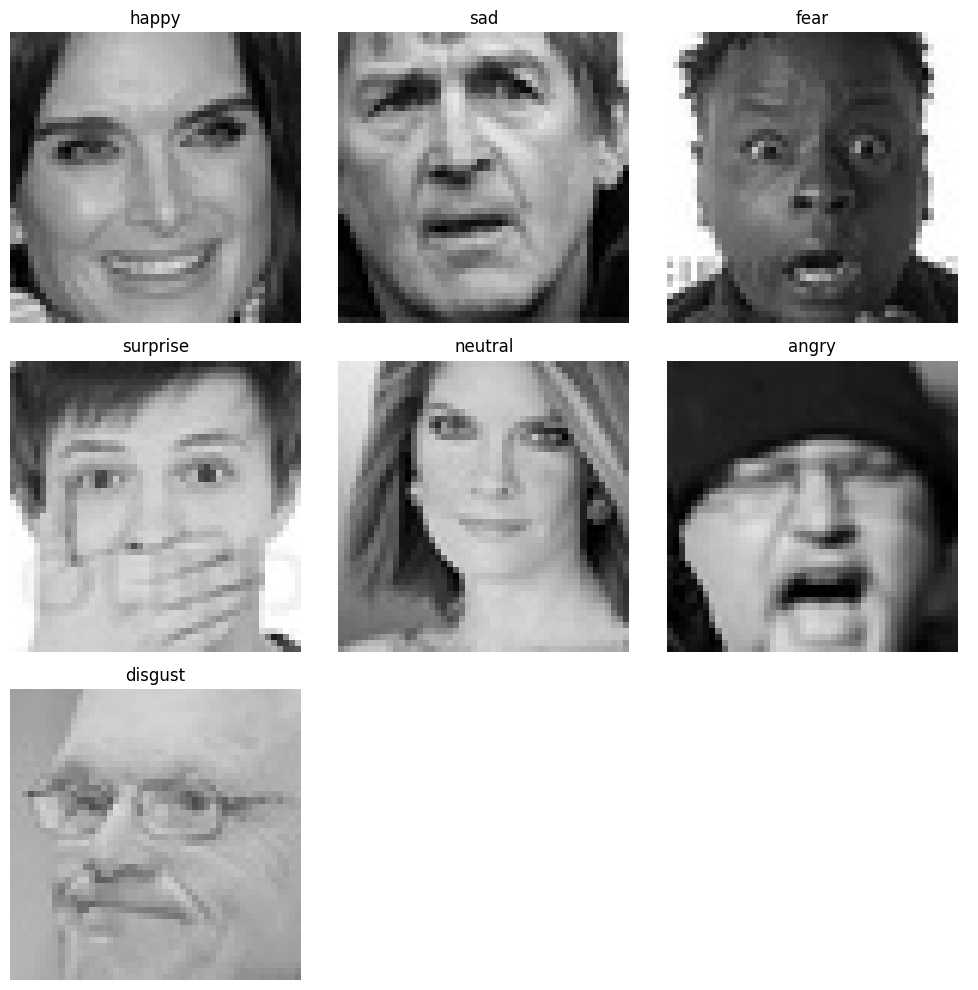

In [8]:
# showing one sample image from train dataset for each emotion
fig, axes = plt.subplots(nrows=(len(emotions) + 2) // 3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for ax, emotion in zip(axes, emotions):
    emotion_path = os.path.join(train_path, emotion)
    emotion_images = os.listdir(emotion_path)
    random_image = random.choice(emotion_images)
    image_path = os.path.join(emotion_path, random_image)
    image = Image.open(image_path).convert("RGB")  # Convert to RGB to show original color
    ax.imshow(image)
    ax.set_title(emotion)
    ax.axis('off')

# Hide any unused subplots
for ax in axes[len(emotions):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
from collections import Counter

for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    emotion_images = os.listdir(emotion_path)
    dimensions = []
    for image_name in emotion_images:
        image_path = os.path.join(emotion_path, image_name)
        with Image.open(image_path) as img:
            dimensions.append(img.size)
    dimension_counts = Counter(dimensions)
    print(f"Emotion: {emotion}")
    for dim, count in dimension_counts.items():
        print(f"  Dimension: {dim}, Count: {count}")

Emotion: happy
  Dimension: (48, 48), Count: 7215
Emotion: sad
  Dimension: (48, 48), Count: 4830
Emotion: fear
  Dimension: (48, 48), Count: 4097
Emotion: surprise
  Dimension: (48, 48), Count: 3171
Emotion: neutral
  Dimension: (48, 48), Count: 4965
Emotion: angry
  Dimension: (48, 48), Count: 3995
Emotion: disgust
  Dimension: (48, 48), Count: 436
